<b>Event #1</b>

Assume each player is dealt two cards using blackjack rules, what is the probability the points of those two cards are higher than other possible outcomes?

In [2]:
import math
import random
from collections import Counter
import numpy as np

def combinations(n, r):
    return (math.factorial(n))/(math.factorial(n-r) * math.factorial(r))

# Returns number of pairs in arr[0..n-1]  
# with sum equal to 'sum' 
def getPairsCount(arr, n, desired_sum): 
    pairs = []  
    count = 0 # Initialize result 
  
    # Consider all possible pairs 
    # and check their sums 
    for i in range(0, n): 
        for j in range(i + 1, n): 
            if arr[i] + arr[j] == desired_sum: 
                pairs.append([arr[i],arr[j]])
                count += 1
      
    return pairs, count

class Card:
    def __init__(self, suite, value):
        self.suite = suite
        self.value = value
    
    def show(self):
        print('{} of {}'.format(self.value, self.suite))

class Deck:
    def __init__(self, decks = 1):
        self.cards = []
        i = 0
        while i < decks:
            self.build()
            i+=1
    
    def build(self):
        for s in ['Spades', 'Clubs', 'Diamonds', 'Hearts']:
            # Number Cards
            for v in range(2, 10):
                self.cards.append(Card(s,v))
            #Cards worth 10 - 4 total (10, Jack, Queen, King)
            for v in range (0, 4):
                self.cards.append(Card(s,10))
            #Ace worth 11 for simplicity
            self.cards.append(Card(s,11)) 
            
    def shuffle(self):
        for i in range(len(self.cards) - 1, 0, -1):
            r = random.randint(0, i)
            self.cards[i], self.cards[r] = self.cards[r], self.cards[i]
    
    def show(self):
        for c in self.cards:
            c.show()
    
    def drawCard(self, value=None, suite=None):
        if value != None and suite != None:
            index = 0
            while index < len(self.cards):
                if self.cards[index].suite == suite and self.cards[index].value == value:
                    return self.cards.pop(index)
                index += 1
                
        else:
            return self.cards.pop()
    
class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []
        
    def draw(self, deck, value=None, suite=None):
        self.hand.append(deck.drawCard(value, suite))
        return self
    
    def showHand(self):
        for card in self.hand:
            card.show()        
            
# Create a four card deck
deck = Deck(4)

# Initialize the players at the table playing Blackjack
chris = Player('Chris')
matt = Player('Matt')
meghan = Player('Meghan')
theresa = Player('Theresa')
dealer = Player('Dealer')

#####################################
######      Scenario 1         ######
#####################################

# Deal first card --- Using preset set of cards to create the scenario
dealer_first_card = 5

chris.draw(deck, 10, 'Hearts')
matt.draw(deck, 11, 'Hearts')
meghan.draw(deck, 4, 'Hearts')
theresa.draw(deck, 9, 'Hearts')

# Deal second card --- Using preset set of cards to create the scenario
chris.draw(deck, 3, 'Spades')
matt.draw(deck, 10, 'Spades')
meghan.draw(deck, 3, 'Spades')
theresa.draw(deck, 8, 'Spades')

# Hit Meghan
meghan.draw(deck, 7, 'Spades')


# for graph later
x = []
y = []

for dealer_first_card in range(2,12):
    overall_probability_to_win = 0
    overall_probability_to_lose = 0
    
    dealer.draw(deck, dealer_first_card, 'Diamonds')
    
    print('If Dealer draws a {}:'.format(dealer_first_card))

    # Get the unique list of cards and the number of cards with that value
    card_summary = Counter([item.value for item in deck.cards])
    card_values_left = [key for key in card_summary.keys()]
    n_card_left = len(card_values_left)

    for score in range(17, 22):
        print('\tDealer Hand (score): {}'.format(score))
        try:
            scenarios = 0

            next_two_card_total_needed = score - dealer_first_card
            print('\t\tdesired sum = {}'.format(next_two_card_total_needed))
            pairs, pair_count = getPairsCount(card_values_left, n_card_left, next_two_card_total_needed)

            base_count = 0
            for item in pairs:
                base_count = min([card_summary[item[0]], card_summary[item[1]]])
                scenarios += base_count
            print('\t\tPairs: {}'.format(pairs))
            print('\t\tScenarios: {}'.format(scenarios))

            bust_scenarios = len(deck.cards) - scenarios
            probability_for_score = (combinations(scenarios,2)*combinations(bust_scenarios,0))/\
                combinations(len(deck.cards),2)

            print('\t\tProbability: {}'.format(round(probability_for_score,3)))
            
            overall_probability_to_win += probability_for_score
        except ValueError:
            pass
        
    overall_probability_to_lose = 1 - overall_probability_to_win
    
    overall_probability_to_win = round(overall_probability_to_win,3)
    overall_probability_to_lose = round(overall_probability_to_lose,3)
    
    x.append([dealer_first_card])
    y.append([overall_probability_to_win])
    
    print('------------------------------------------------------------')
    print('Probability to win = {}, Probability to lose = {}'.format(overall_probability_to_win\
                                                                       ,overall_probability_to_lose))
    
    print('\n\n')

If Dealer draws a 2:
	Dealer Hand (score): 17
		desired sum = 15
		Pairs: [[4, 11], [5, 10], [6, 9], [7, 8]]
		Scenarios: 61
		Probability: 0.094
	Dealer Hand (score): 18
		desired sum = 16
		Pairs: [[5, 11], [6, 10], [9, 7]]
		Scenarios: 46
		Probability: 0.053
	Dealer Hand (score): 19
		desired sum = 17
		Pairs: [[6, 11], [9, 8], [10, 7]]
		Scenarios: 45
		Probability: 0.051
	Dealer Hand (score): 20
		desired sum = 18
		Pairs: [[10, 8], [11, 7]]
		Scenarios: 30
		Probability: 0.022
	Dealer Hand (score): 21
		desired sum = 19
		Pairs: [[9, 10], [11, 8]]
		Scenarios: 30
		Probability: 0.022
------------------------------------------------------------
Probability to win = 0.242, Probability to lose = 0.758



If Dealer draws a 3:
	Dealer Hand (score): 17
		desired sum = 14
		Pairs: [[4, 10], [5, 9], [6, 8], [11, 3]]
		Scenarios: 58
		Probability: 0.086
	Dealer Hand (score): 18
		desired sum = 15
		Pairs: [[4, 11], [5, 10], [6, 9], [7, 8]]
		Scenarios: 61
		Probability: 0.095
	Dealer Han

<function matplotlib.pyplot.show(*args, **kw)>

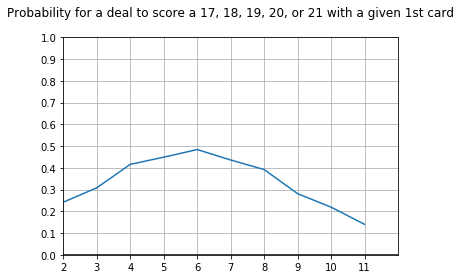

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#--- Start Graph ---
plt.clf

plt.title('Probability for a deal to score a 17, 18, 19, 20, or 21 with a given 1st card\n')

plt.xlim(2,12)
plt.ylim(0,1)

# set the x and y labels
plt.xticks(np.arange(2, 12, 1))
plt.yticks(np.arange(0, 1.1, .1))

# show the x and y axis with grid
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')

# plot the graph
plt.plot(x,y)
plt.show